In [1]:
from model import InstanceLearning

instance_learning_model = InstanceLearning(vocab_size=5000, max_sent=7, max_len=30, embedding_dim=300)

Using TensorFlow backend.


In [2]:
instance_learning_model.read_review_data(nrows=250000)

Read in 250000 yelp reviews


In [3]:
instance_learning_model.process_data()
instance_learning_model.get_pretrained_embeddings()

Prep the training data
Prep the pretrained word embeddings


In [4]:
instance_learning_model.get_models(dropout_prob=0.4, embedding_trainable=False)

instance_learning_model.train(epochs=10, save_weights=True)

Train on 177096 samples, validate on 44274 samples
Epoch 1/10
177096/177096 [==============================] - 220s 1ms/step - loss: 0.2288 - acc: 0.8518 - val_loss: 0.1634 - val_acc: 0.8913
Epoch 2/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1524 - acc: 0.8846 - val_loss: 0.1517 - val_acc: 0.8767
Epoch 3/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1414 - acc: 0.8947 - val_loss: 0.1459 - val_acc: 0.9004
Epoch 4/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1348 - acc: 0.8994 - val_loss: 0.1446 - val_acc: 0.9067
Epoch 5/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1313 - acc: 0.9025 - val_loss: 0.1412 - val_acc: 0.8939
Epoch 6/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1294 - acc: 0.9036 - val_loss: 0.1404 - val_acc: 0.9009
Epoch 7/10
177096/177096 [==============================] - 224s 1ms/step - loss: 0.1286 - acc: 0.9045 - val_

## Setting up the demo environment

In [2]:
#from model import InstanceLearning

#instance_learning_model = InstanceLearning(vocab_size=3000, max_sent=7, max_len=30, embedding_dim=300)

instance_learning_model.load_saved_model()

## EXAMPLE 1:

In [16]:
"This restaurant is very good. The atmosphere is great. You can choose many different dishes and they are all very good. The only thing I would not recommend is their sushi."

'This restaurant is very good. The atmosphere is great. You can choose many different dishes and they are all very good. The only thing I would not recommend is their sushi.'

In [17]:
instance_learning_model.demo()

Enter the reviews here:"This restaurant is very good. The atmosphere is great. You can choose many different dishes and they are all very good. The only thing I would not recommend is their sushi."


This review is positive


"This restaurant is very good.
The atmosphere is great.
You can choose many different dishes and they are all very good.
The only thing I would not recommend is their sushi."


In [5]:
"I really don't like this bar. The floor is dirty and people are rude here. I only added 1 star to the review because of their huge selection of beer"

"I really don't like this bar. The floor is dirty and people are rude here. I only added 1 star to the review because of their huge selection of beer"

In [6]:
instance_learning_model.demo()

Enter the reviews here:"I really don't like this bar. The floor is dirty and people are rude here. I only added 1 star to the review because of their huge selection of beer"


This review is negative


"I really don't like this bar.
The floor is dirty and people are rude here.
I only added 1 star to the review because of their huge selection of beer"


## Test/Validation Section

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read 50,000 records for validation purpose
validation_predictions = instance_learning_model.load_validation_data(nrows = 50000)

In [7]:
# Covenient function to convert the prediction data to a dataframe
def df_convert(star):
    df = pd.DataFrame({"Review":["{} star".format(star)]*validation_predictions[star].reshape(-1,).shape[0], 
                       "Predictions": validation_predictions[star].reshape(-1,)})
    
    return df

In [8]:
# Concat predictions from all rating categories
plot_df = pd.concat([df_convert(i) for i in range(1,6)])

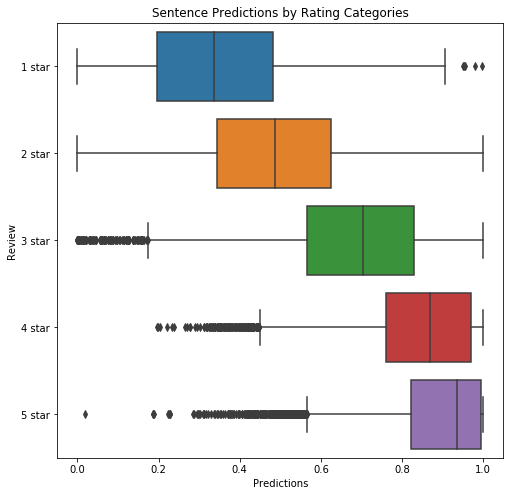

In [12]:
# Plot the data
f, ax = plt.subplots(figsize = (8,8))
sns.boxplot(x="Predictions", y="Review", data = plot_df)
ax.set_title("Sentence Predictions by Rating Categories")
plt.show()